In [0]:
#Facebook Prophet prediction model.
from flask import Flask
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

import numpy as np


app = Flask(__name__)
@app.route('/')
def hello_world():
    return 'Hello, World'
app.run()
app.run(host='localhost', port='5001')


# Load Dataset

In [46]:
# Confirmation, recovery, and death data sets by region worldwide
url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv'
data = pd.read_csv(url, error_bad_lines=False)

# Understanding the structure of the data set
data.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


# Make it Simple

In [47]:
# Make Egypt's confirmed cases timeseries dataframe

df_egypt = data[data['Country/Region'] == 'Egypt']

df_egypt = np.column_stack([df_egypt.Date, df_egypt.Confirmed])
df_egypt =  pd.DataFrame(df_egypt)

df_egypt = df_egypt.reset_index().rename(columns={0: 'date', 1: 'confirmed'})
df_egypt = df_egypt.drop("index", axis=1)

df_egypt.tail()

,date,confirmed
76,2020-04-07,1450
77,2020-04-08,1560
78,2020-04-09,1699
79,2020-04-10,1794
80,2020-04-11,1939


# Plot

In [48]:
# Plot egypt COVID19 confirmed cases.

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_egypt.date,
        y=df_egypt.confirmed,
        name='Confirmed in Egypt'
    )
)

fig

# Facebook Prophet

In [49]:
# Make dataframe for Facebook Prophet prediction model.
df_prophet = df_egypt.rename(columns={
    'date': 'ds',
    'confirmed': 'y'
})

df_prophet.tail()

,ds,y
76,2020-04-07,1450
77,2020-04-08,1560
78,2020-04-09,1699
79,2020-04-10,1794
80,2020-04-11,1939


# Create a Model

# Add changepoints to Make More Flexible
- https://facebook.github.io/prophet/docs/trend_changepoints.html

In [50]:
# Make Prophet model including daily seasonality
m = Prophet(
    changepoint_prior_scale=0.2, # increasing it will make the trend more flexible
    changepoint_range=0.9, # place potential changepoints in the first 98% of the time series
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=True,
    seasonality_mode='additive'
)

m.fit(df_prophet)

future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

fig = plot_plotly(m, forecast)
py.iplot(fig)

# Plot changepoints

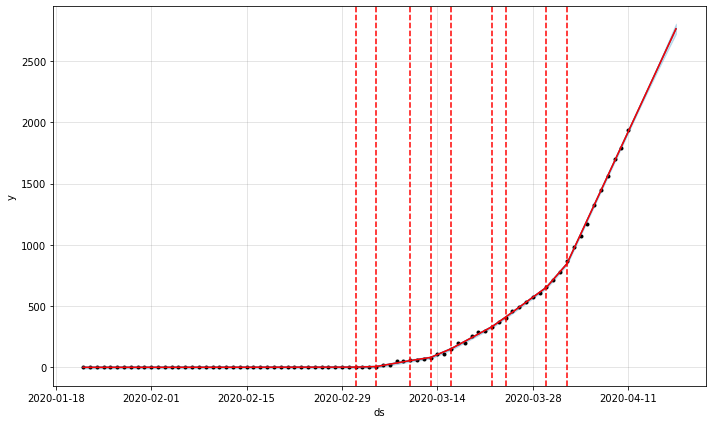

In [51]:
# display changepoints as red dotted line on the plot.
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)